In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import splitwavepy as sw
import matplotlib.pyplot as plt

In [2]:
a = sw.Data(split=[(30,1.2),(50,1.2)], delta=0.05, noise=0.03)
a.plot()

In [3]:
a.Q(rcvcorr=(40,1.2)).plot()

# The idea

Use bootstrapping to calculate the 95% confidence interval of the test statistic.  In the case of EigenM this will be $\lambda_2$ (or some combination of $\lambda_1$ and $\lambda_2$). In the case of the cross-correlation method this will be the absolute value of the Pearson correlation co-efficient.

The algorithm should trial a receiver correction, then calculate the test statistic at the "correct" solution. Bootstrap resampling of the data points should be used to get a population of values. This process should be repeated many times to build up a population of possible test statistics.  The 95% confidence contour can then be measured directly from the population.

In [4]:
def _bootstrap_samp(x, y):
    idx = np.random.choice(x.size, x.size)
    return x[idx], y[idx]

def _trial_correction(data, fast, lag):
    # apply correction to data
    x, y = data.unsplit(correction).chopdata()
    
def _get_random_corr(x, dx):
    return np.random.normal(x, dx)

def rcvcorr_err(fast, dfast, lag, dlag, n=10):
    
    for t_fast, t_lag in zip(
        np.random.normal(fast, dfast, n),
        np.random.normal(lag, dlag, n)):
        
        print(t_fast, t_lag)




In [5]:
a = sw.Data(delta=0.1, noise=0.01)
x, y = a.chopdata()
xc = np.abs(sw.core.core.pearson(x, y))
bslist = [ sw.core.core.pearson(*_bootstrap_samp(x, y)) for ii in range(10000) ]
bsarray = np.abs(np.asarray(bslist))
plt.hist(bsarray, bins=100)

# the original measured lam1/lam2 in red
plt.axvline(xc, color='r')
# the bootstrapmean lam1/lam2 in black
mean = np.mean(bsarray)
std = np.std(bsarray)
plt.axvline(mean, color='k', alpha=0.02)
plt.axvline(mean-1.96*std, color='k', linestyle='--')
plt.axvline(mean+1.96*std, color='k', linestyle='--')
# the bootstrap confidence limits
median = np.percentile(bsarray,50)
lower95 = np.percentile(bsarray,2.5)
upper95 = np.percentile(bsarray,97.5)
plt.axvline(median, color='g', alpha=0.02)
plt.axvline(lower95, color='g', linestyle='--')
plt.axvline(upper95, color='g', linestyle='--')
plt.show()
a.plot()

In [6]:
rcvcorr_err(14,3,2,.4)

16.395557514 2.12180722649
9.86206751992 1.45957301553
12.8579087938 2.95379219886
18.6772220414 2.41473021471
16.0359968513 2.18440290287
12.4818128633 2.19014025791
12.816064401 1.48447616049
17.332426168 2.47235648475
18.3352400967 1.46831587835
10.6093650779 2.26213064475


In [11]:
a = sw.Data(delta=0.1, noise=0.04, split=[(30,1.2),(50,0.4)])
b = a.Q(rcvcorr=(50,0.4))
# b=a.Q()
b.plot()

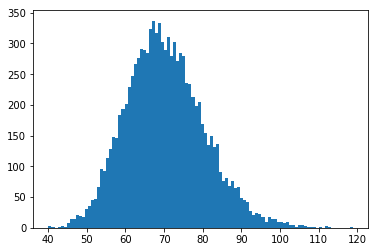

In [26]:
bscorr = b.sc._correction_variance(rcvinfo=(50,0,0.4,0))
plt.hist(bscorr, 100)
plt.show()
kde = sw.core.core.kde(bscorr)
ravmap = np.ravel(b.sc.vals())
pdf = kde.pdf(ravmap).reshape(b.sc.vals().shape)
pdf = pdf / np.sum(pdf)

plt.figure(1)
plt.subplot(211)
plt.contourf(*b._grid(), b.pdf)
plt.subplot(212)
plt.contourf(*b._grid(), pdf)
plt.show()

In [18]:
sw.core.core.kde(bscorr)
ravmap = np.ravel(b.vals())
pdf = kde.pdf(ravmap).reshape(self.vals().shape)

# Distraction on probability distributions

In [10]:
fast = 60
lag = 2
a = sw.Data(delta=0.1,noise=0.1,split=(fast, lag))
pca = a.EigenM()
xc = a.XcorrM()
ppdf = pca.estimate_pdf()
xpdf = xc.estimate_pdf()
pca.plot()
xc.plot()

AttributeError: 'Data' object has no attribute 'EigenM'

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
# fast direction
x = pca.degs
pfp = pca.fastprofile(vals=ppdf)
xfp = xc.fastprofile(vals=xpdf)
cfp = pca.fastprofile(vals=(ppdf+xpdf)/2)
ax[0].plot(x,pfp,alpha=0.5,label='pca')
ax[0].plot(x,xfp,alpha=0.5,label='xc')
ax[0].plot(x,cfp,label='pca+xc',linewidth=3)
ax[0].axvline(fast)
ax[0].legend()
ax[0].set_xlabel('fast direction')
ax[0].set_ylabel('P')
# lag time
x = pca.lags
pfp = pca.lagprofile(vals=ppdf)
xfp = xc.lagprofile(vals=xpdf)
cfp = pca.lagprofile(vals=(ppdf+xpdf)/2)
ax[1].plot(x,pfp,alpha=0.5,label='pca')
ax[1].plot(x,xfp,alpha=0.5,label='xc')
ax[1].plot(x,cfp,label='pca+xc',linewidth=3)
ax[1].axvline(lag)
ax[1].legend()
ax[1].set_xlabel('lag')
ax[1].set_ylabel('P')
plt.show()

In [ ]:
x = pca.lags
pfp = pca.lagprofile(vals=ppdf)
xfp = xc.lagprofile(vals=xpdf)
cfp = pca.lagprofile(vals=(ppdf+xpdf)/2)
plt.plot(x,pfp,alpha=0.5,label='pca')
plt.plot(x,xfp,alpha=0.5,label='xc')
plt.plot(x,cfp,label='pca+xc',linewidth=3)
plt.axvline(lag)
plt.legend()
plt.xlabel('lag')
plt.ylabel('P')
plt.show()

In [ ]:
plt.hist(ppdf.flatten(),50,log=True)
plt.show()

In [ ]:
xk = np.sort(ppdf.flatten())
pk = np.cumsum(xk)
plt.plot(xk,pk)
plt.show()
plt.plot(pk,xk)
plt.show()

In [ ]:
from scipy import stats
custm = stats.rv_discrete(name='custm', values=(pk,xk))

In [ ]:
custm.cdf()

In [ ]:
sw.core.core.val_at_alpha(ppdf.flatten(),0.05)

In [ ]:
xk